<a href="https://colab.research.google.com/github/edgar-avilan-tf9/project-repo/blob/main/Pix2PixUNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
! nvidia-smi

Tue Aug 22 21:40:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |  11351MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import torch
import torchvision
device= 'cuda' if torch.cuda.is_available() else 'cpu'
from torchvision import transforms
print(device)
from torchvision import datasets
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

cuda


In [2]:
from torchvision.utils import make_grid

In [3]:
from utils_unet import *

In [4]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_shifted = image_tensor
    image_unflat = image_shifted.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [5]:
import torch.nn.functional as F
# New parameters
adv_criterion = nn.BCEWithLogitsLoss()
recon_criterion = nn.L1Loss()
lambda_recon = 200

n_epochs = 20
input_dim = 3
real_dim = 3
display_step = 200
batch_size = 4
lr = 0.0002
target_shape = 256
device = 'cuda'

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
])


In [7]:
import torchvision
dataset = torchvision.datasets.ImageFolder("maps2/maps", transform=transform)

In [8]:
#!unzip maps.zip -d maps2

In [9]:
dataset

Dataset ImageFolder
    Number of datapoints: 2194
    Root location: maps2/maps
    StandardTransform
Transform: Compose(
               ToTensor()
           )

# Initialize

In [10]:
gen = UNet(input_dim, real_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator(input_dim + real_dim).to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [11]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

In [12]:
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

In [13]:
def get_gen_loss(gen, disc, real, condition, adv_criterion, recon_criterion, lambda_recon):
    fake_im= gen(condition)
    disc_fake= disc(fake_im,condition)
    adv_loss= adv_criterion(disc_fake, torch.ones_like(disc_fake))
    recon_loss=recon_criterion(real, fake_im)
    gen_loss= adv_loss*(1)+recon_loss*(lambda_recon)
    return gen_loss

In [14]:
mean_generator_loss = 0
mean_discriminator_loss = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
cur_step = 0

In [16]:
for image, _ in dataloader:
    print(image.shape)
    break

torch.Size([4, 3, 600, 1200])


In [17]:
len(dataloader)

549

  0%|          | 0/549 [00:00<?, ?it/s]

Pretrained initial state


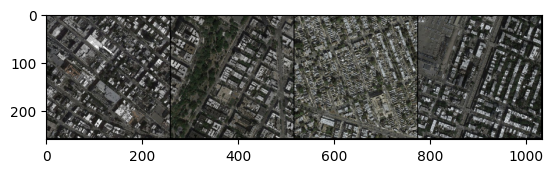

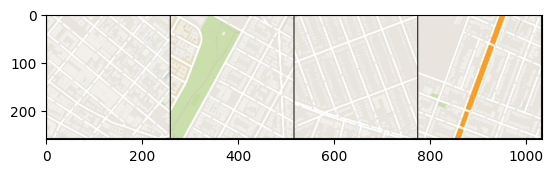

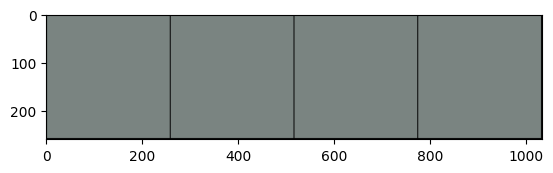

Epoch 0: Step 200: Generator (U-Net) loss: 75.03273767471312, Discriminator loss: 0.6485603109002116


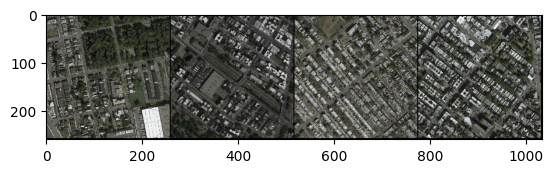

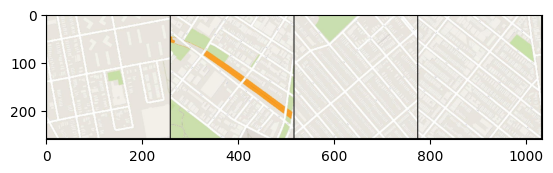

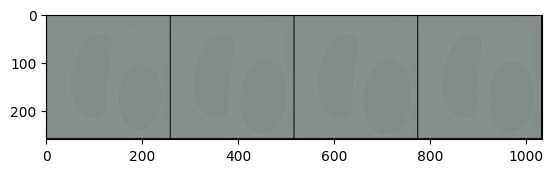

Epoch 0: Step 400: Generator (U-Net) loss: 60.62071420669559, Discriminator loss: 0.41741271466016777


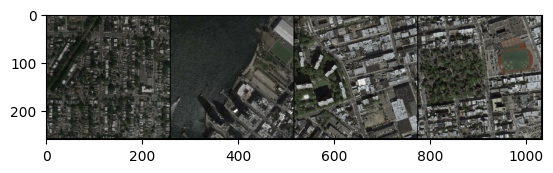

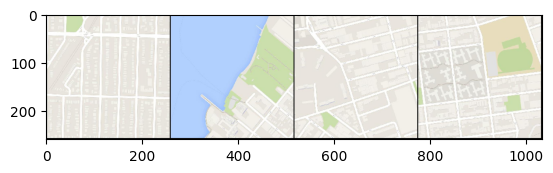

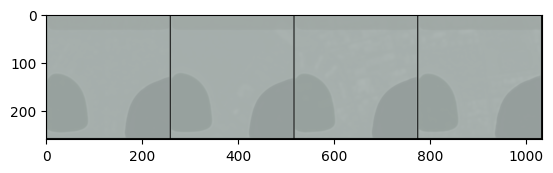

  0%|          | 0/549 [00:00<?, ?it/s]

Epoch 1: Step 600: Generator (U-Net) loss: 36.82087664604187, Discriminator loss: 0.4639466466009616


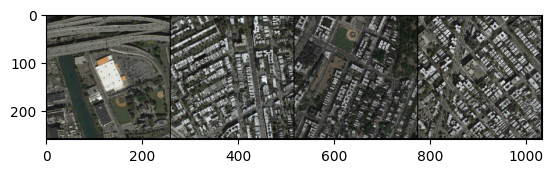

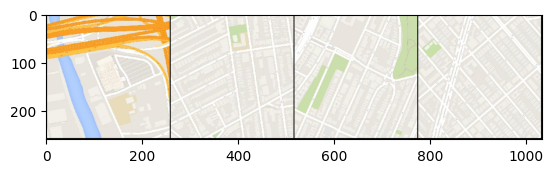

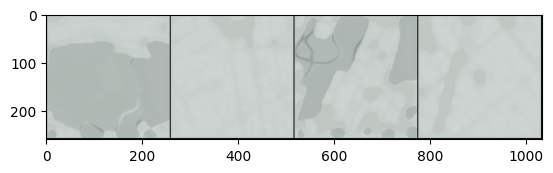

Epoch 1: Step 800: Generator (U-Net) loss: 19.410743498802173, Discriminator loss: 0.23173712655901904


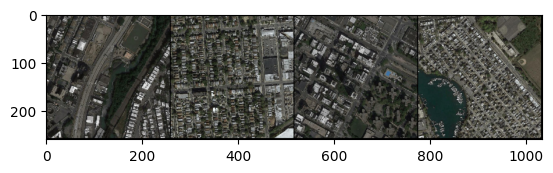

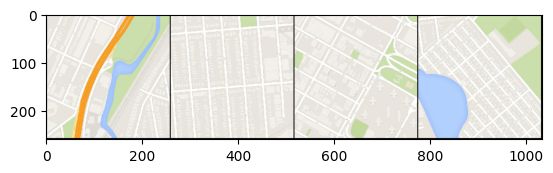

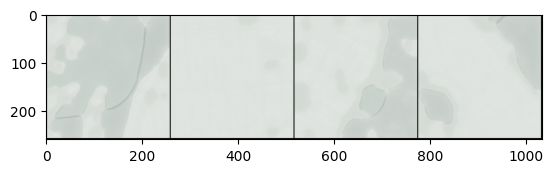

Epoch 1: Step 1000: Generator (U-Net) loss: 14.017333712577816, Discriminator loss: 0.10003953559324145


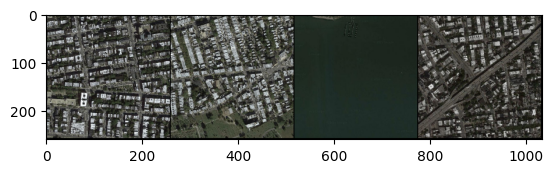

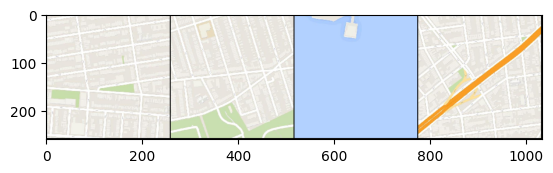

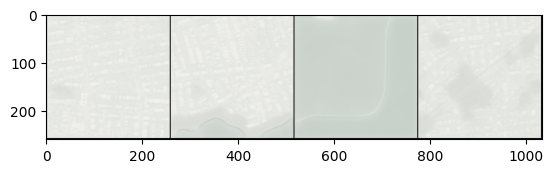

  0%|          | 0/549 [00:00<?, ?it/s]

Epoch 2: Step 1200: Generator (U-Net) loss: 13.69417695045472, Discriminator loss: 0.050300614442676334


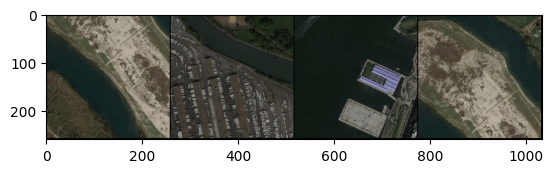

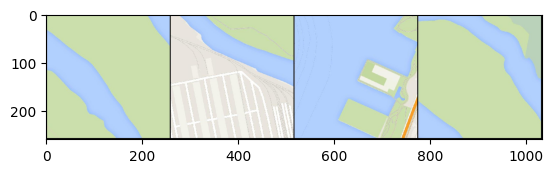

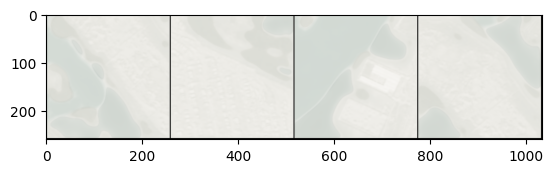

Epoch 2: Step 1400: Generator (U-Net) loss: 13.805077834129335, Discriminator loss: 0.04304118692874907


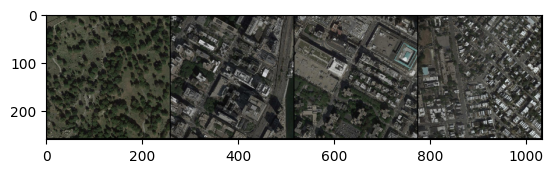

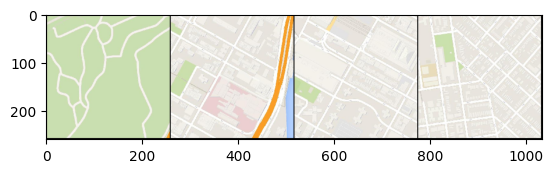

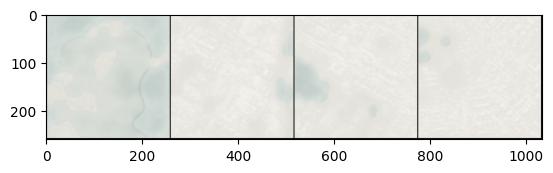

Epoch 2: Step 1600: Generator (U-Net) loss: 14.034009318351751, Discriminator loss: 0.024149856236763283


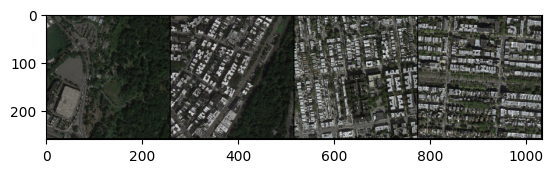

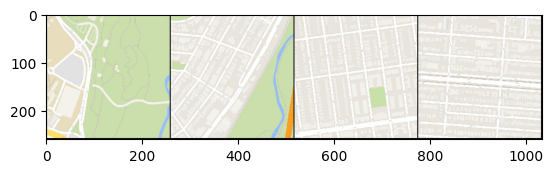

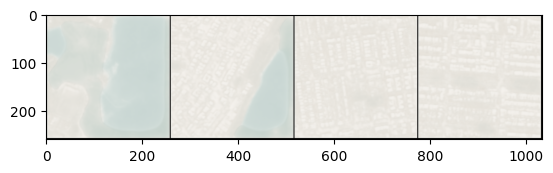

  0%|          | 0/549 [00:00<?, ?it/s]

Epoch 3: Step 1800: Generator (U-Net) loss: 13.856985430717469, Discriminator loss: 0.03266697912476957


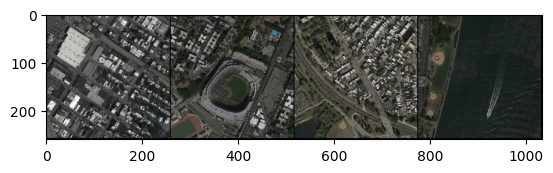

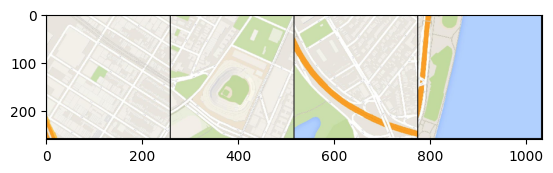

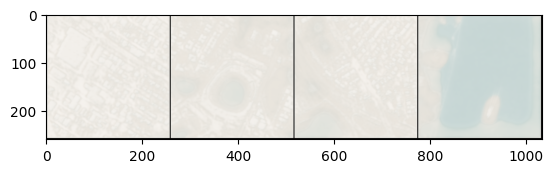

Epoch 3: Step 2000: Generator (U-Net) loss: 14.504748811721806, Discriminator loss: 0.012219662619754669


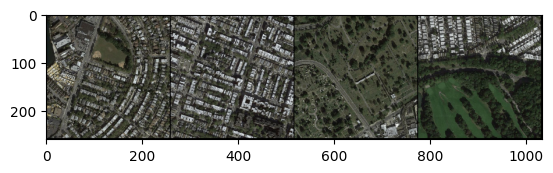

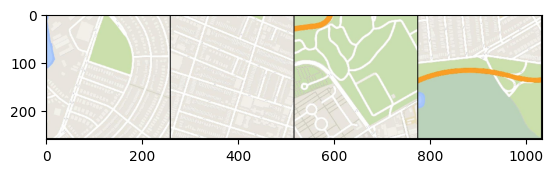

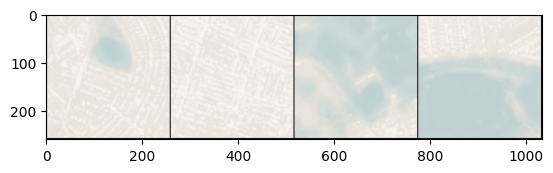

  0%|          | 0/549 [00:00<?, ?it/s]

Epoch 4: Step 2200: Generator (U-Net) loss: 14.330409550666802, Discriminator loss: 0.016247599918860937


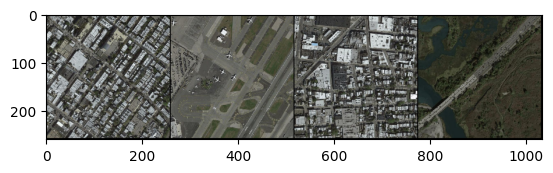

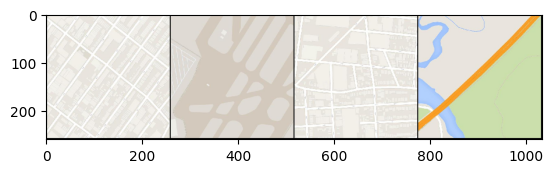

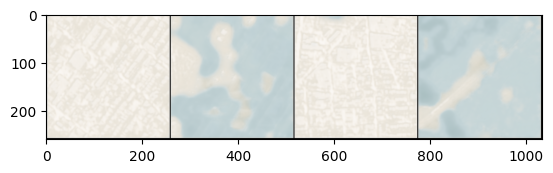

Epoch 4: Step 2400: Generator (U-Net) loss: 14.464843840599055, Discriminator loss: 0.008091933275572958


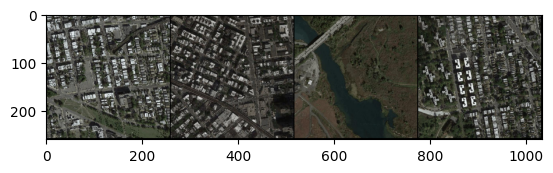

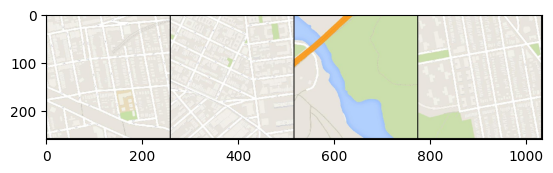

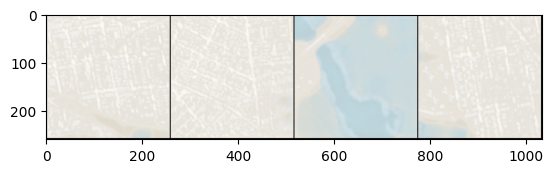

Epoch 4: Step 2600: Generator (U-Net) loss: 13.451604647636419, Discriminator loss: 0.08665880766231572


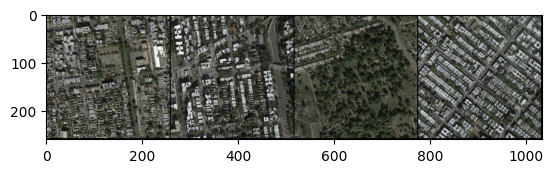

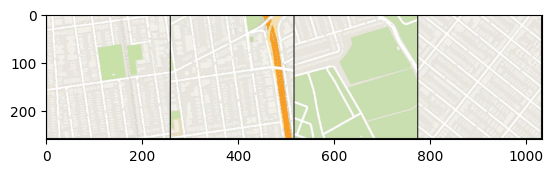

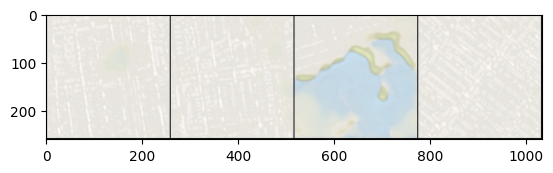

  0%|          | 0/549 [00:00<?, ?it/s]

Epoch 5: Step 2800: Generator (U-Net) loss: 11.516771898269647, Discriminator loss: 0.2952433628356085


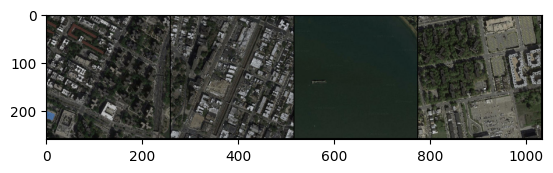

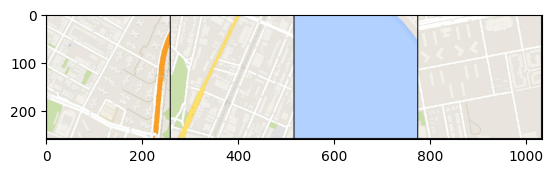

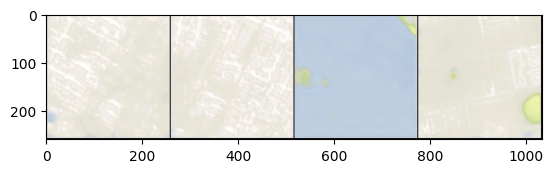

Epoch 5: Step 3000: Generator (U-Net) loss: 11.08225221633911, Discriminator loss: 0.32661636115983145


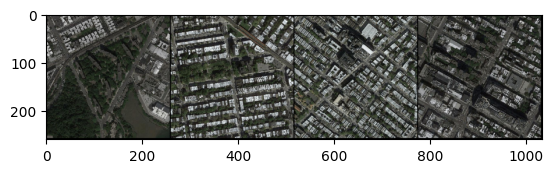

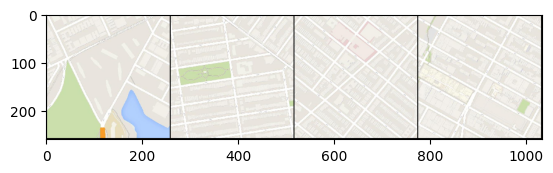

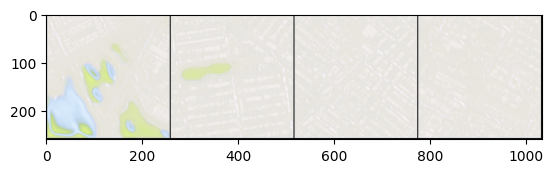

Epoch 5: Step 3200: Generator (U-Net) loss: 10.902629036903383, Discriminator loss: 0.29811230117455134


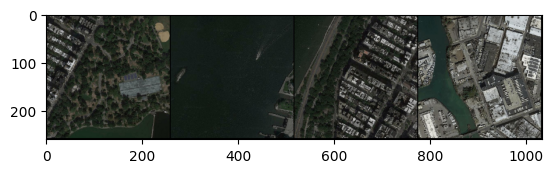

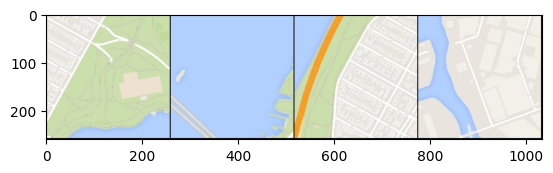

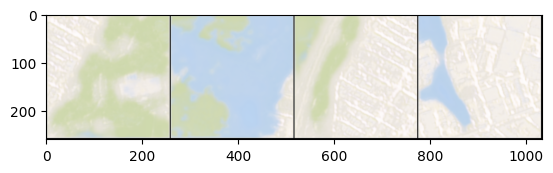

In [ ]:
for epoch in range(n_epochs):
    # Dataloader returns the batches
    for image, _ in tqdm(dataloader):
        image_width = image.shape[3]
        condition = image[:, :, :, :image_width // 2]
        condition = nn.functional.interpolate(condition, size=target_shape)
        real = image[:, :, :, image_width // 2:]
        real = nn.functional.interpolate(real, size=target_shape)
        cur_batch_size = len(condition)
        condition = condition.to(device)
        real = real.to(device)

        ### Update discriminator ###
        disc_opt.zero_grad() # Zero out the gradient before backpropagation
        with torch.no_grad():
            fake = gen(condition)
        disc_fake_hat = disc(fake.detach(), condition) # Detach generator
        disc_fake_loss = adv_criterion(disc_fake_hat, torch.zeros_like(disc_fake_hat))
        disc_real_hat = disc(real, condition)
        disc_real_loss = adv_criterion(disc_real_hat, torch.ones_like(disc_real_hat))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2
        disc_loss.backward(retain_graph=True) # Update gradients
        disc_opt.step() # Update optimizer

        ### Update generator ###
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, real, condition, adv_criterion, recon_criterion, lambda_recon)
        gen_loss.backward() # Update gradients
        gen_opt.step() # Update optimizer

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step
        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ### Visualization code ###
        if cur_step % display_step == 0:
            if cur_step > 0:
                print(f"Epoch {epoch}: Step {cur_step}: Generator (U-Net) loss: {mean_generator_loss}, Discriminator loss: {mean_discriminator_loss}")
            else:
                print("Pretrained initial state")
            show_tensor_images(condition, size=(input_dim, target_shape, target_shape))
            show_tensor_images(real, size=(real_dim, target_shape, target_shape))
            show_tensor_images(fake, size=(real_dim, target_shape, target_shape))
            mean_generator_loss = 0
            mean_discriminator_loss = 0
            # You can change save_model to True if you'd like to save the model

            torch.save({'gen': gen.state_dict(),
                'gen_opt': gen_opt.state_dict(),
                'disc': disc.state_dict(),
                'disc_opt': disc_opt.state_dict()
            }, f"pix2pix_{cur_step}.pth")
        cur_step += 1

In [63]:
for image, _ in tqdm(dataloader):
    image_width = image.shape[3]
    condition = image[:, :, :, image_width // 2:]
    #condition = nn.functional.interpolate(condition, size=target_shape)
    print(image_width)
    print(image.shape)
    print('Condition is the real image')
    print(condition[0].shape)
    break

  0%|          | 0/549 [00:00<?, ?it/s]

1200
torch.Size([4, 3, 600, 1200])
Condition is the real image
torch.Size([3, 600, 600])


In [64]:
condition[0].detach().cpu().shape
show_it=condition[0].detach().cpu().view(-1,*(3,600,600))
#plt.imshow(condition[0].detach().cpu())

In [65]:
show_it.shape

torch.Size([1, 3, 600, 600])

In [66]:
show_it2=show_it.squeeze()

In [67]:
show_it2.permute(1, 2, 0).shape

torch.Size([600, 600, 3])

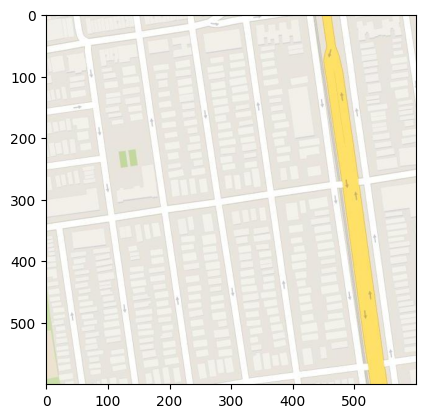

In [68]:
plt.imshow(show_it2.permute(1, 2, 0))

In [61]:
condition4 = nn.functional.interpolate(condition, size=target_shape)

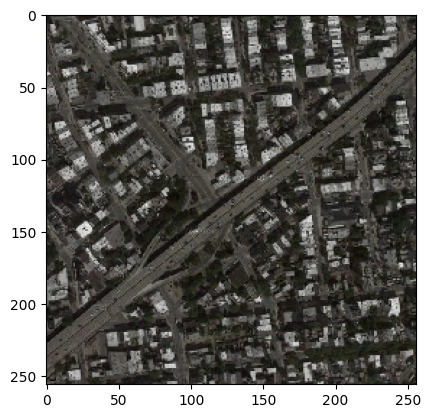

In [62]:
condition4.shape
condition4[0].detach().cpu().shape
show_it4=condition4[0].detach().cpu()
show_it5=show_it4.squeeze()
plt.imshow(show_it5.permute(1, 2, 0))